In [10]:
import random
import torch
from d2l import torch as d2l
import matplotlib.pyplot as plt

In [3]:
tokens = d2l.tokenize(d2l.read_time_machine())
corpus = [token for line in tokens for token in line]
vocab = d2l.Vocab(corpus)
vocab.token_freqs[:10]

[('the', 2261),
 ('i', 1267),
 ('and', 1245),
 ('of', 1155),
 ('a', 816),
 ('to', 695),
 ('was', 552),
 ('in', 541),
 ('that', 443),
 ('my', 440)]

## Zipf 定律

一个语料库中，第 $i$ 个出现最频繁的单词的频率 $f_i$ 满足：

（X 与 Y 成正比：X be proportional to Y）

$$
f_i \propto \frac{1}{i^\alpha}
$$

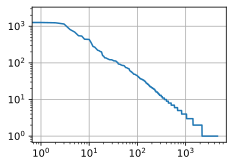

In [4]:
freqs = [freq for _, freq in vocab.token_freqs]
d2l.plot(freqs, xscale='log', yscale='log')

In [5]:
bigram_tokens = [pair for pair in zip(corpus[:-1], corpus[1:])]
bigram_vocab = d2l.Vocab(bigram_tokens)
bigram_vocab.token_freqs[:10]

[(('of', 'the'), 309),
 (('in', 'the'), 169),
 (('i', 'had'), 130),
 (('i', 'was'), 112),
 (('and', 'the'), 109),
 (('the', 'time'), 102),
 (('it', 'was'), 99),
 (('to', 'the'), 85),
 (('as', 'i'), 78),
 (('of', 'a'), 73)]

In [6]:
trigram_tokens = [triple for triple in zip(corpus[:-2], corpus[1:-1], corpus[2:])]
trigram_vocab = d2l.Vocab(trigram_tokens)
trigram_vocab.token_freqs[:10]

[(('the', 'time', 'traveller'), 59),
 (('the', 'time', 'machine'), 30),
 (('the', 'medical', 'man'), 24),
 (('it', 'seemed', 'to'), 16),
 (('it', 'was', 'a'), 15),
 (('here', 'and', 'there'), 15),
 (('seemed', 'to', 'me'), 14),
 (('i', 'did', 'not'), 14),
 (('i', 'saw', 'the'), 13),
 (('i', 'began', 'to'), 13)]

[309,
 169,
 130,
 112,
 109,
 102,
 99,
 85,
 78,
 73,
 68,
 67,
 62,
 61,
 61,
 60,
 51,
 51,
 49,
 49,
 47,
 47,
 46,
 45,
 45,
 45,
 44,
 44,
 41,
 40,
 40,
 39,
 39,
 39,
 39,
 37,
 36,
 36,
 36,
 34,
 34,
 34,
 32,
 32,
 31,
 30,
 30,
 30,
 30,
 29,
 28,
 28,
 28,
 27,
 27,
 27,
 27,
 26,
 26,
 26,
 25,
 25,
 25,
 24,
 24,
 24,
 24,
 23,
 23,
 23,
 23,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 21,
 21,
 21,
 21,
 21,
 21,
 20,
 20,
 20,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 17,
 17,
 17,
 17,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 11,
 11,

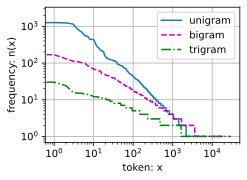

In [12]:
# The token freq has been sorted.
bigram_freqs = [freq for token, freq in bigram_vocab.token_freqs]
trigram_freqs = [freq for token, freq in trigram_vocab.token_freqs]
d2l.plot([freqs, bigram_freqs, trigram_freqs], xlabel='token: x',
         ylabel='frequency: n(x)', xscale='log', yscale='log',
         legend=['unigram', 'bigram', 'trigram'])


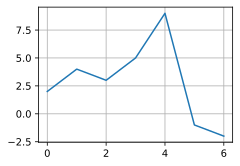

In [15]:
d2l.plot([2, 4, 3, 5, 9, -1, -2]) # 对于 d2l.plot，可以直接画出曲线

## 读取长序列

Partition such a long sequence into subsequences with the same number of time steps.

Random offset and sequential partition.

### Random sampling

Each example is a subsequence arbitratily captured on the original long sequence.

And the label is the next token after this example.

In [16]:
corpus

['the',
 'time',
 'machine',
 'by',
 'h',
 'g',
 'wells',
 'i',
 'the',
 'time',
 'traveller',
 'for',
 'so',
 'it',
 'will',
 'be',
 'convenient',
 'to',
 'speak',
 'of',
 'him',
 'was',
 'expounding',
 'a',
 'recondite',
 'matter',
 'to',
 'us',
 'his',
 'grey',
 'eyes',
 'shone',
 'and',
 'twinkled',
 'and',
 'his',
 'usually',
 'pale',
 'face',
 'was',
 'flushed',
 'and',
 'animated',
 'the',
 'fire',
 'burned',
 'brightly',
 'and',
 'the',
 'soft',
 'radiance',
 'of',
 'the',
 'incandescent',
 'lights',
 'in',
 'the',
 'lilies',
 'of',
 'silver',
 'caught',
 'the',
 'bubbles',
 'that',
 'flashed',
 'and',
 'passed',
 'in',
 'our',
 'glasses',
 'our',
 'chairs',
 'being',
 'his',
 'patents',
 'embraced',
 'and',
 'caressed',
 'us',
 'rather',
 'than',
 'submitted',
 'to',
 'be',
 'sat',
 'upon',
 'and',
 'there',
 'was',
 'that',
 'luxurious',
 'after',
 'dinner',
 'atmosphere',
 'when',
 'thought',
 'roams',
 'gracefully',
 'free',
 'of',
 'the',
 'trammels',
 'of',
 'precision',


In [22]:
batch_size = 2
num_steps = 5

# 这里以0 - 34为例
corpus1 = my_seq = list(range(35))
num_subseqs = (len(corpus1) - 1) // num_steps
initial_indices = list(range(0, num_subseqs * num_steps, num_steps))
random.shuffle(initial_indices)

def get_data(pos):
    '''
    返回一个序列，从 pos 开始， num_steps 是序列长度
    '''
    return corpus1[pos: pos + num_steps]

num_batches = num_subseqs // batch_size

for i in range(0, batch_size * num_batches, batch_size):
    initial_indices_per_batch = initial_indices[i: i + batch_size]
    sequence_x = [get_data(j) for j in initial_indices_per_batch]
    sequence_y = [get_data(j + 1) for j in initial_indices_per_batch]
    print(sequence_x, sequence_y)
    
'''
可以看到输出结果：
每个 mini-batch 含有 2 个 examples，第一个为 features，第二个为 labels
（labels 的前 4 位与 features 相同，第 5 位为真正需要预测的值
'''


[[20, 21, 22, 23, 24], [25, 26, 27, 28, 29]] [[21, 22, 23, 24, 25], [26, 27, 28, 29, 30]]
[[0, 1, 2, 3, 4], [10, 11, 12, 13, 14]] [[1, 2, 3, 4, 5], [11, 12, 13, 14, 15]]
[[15, 16, 17, 18, 19], [5, 6, 7, 8, 9]] [[16, 17, 18, 19, 20], [6, 7, 8, 9, 10]]


In [23]:
def seq_data_iter_random(corpus, batch_size, num_steps):  #@save
    """Generate a minibatch of subsequences using random sampling."""
    # Start with a random offset (inclusive of `num_steps - 1`) to partition a
    # sequence
    corpus = corpus[random.randint(0, num_steps - 1):]
    # Subtract 1 since we need to account for labels
    num_subseqs = (len(corpus) - 1) // num_steps
    # The starting indices for subsequences of length `num_steps`
    initial_indices = list(range(0, num_subseqs * num_steps, num_steps))
    # In random sampling, the subsequences from two adjacent random
    # minibatches during iteration are not necessarily adjacent on the
    # original sequence
    random.shuffle(initial_indices)

    def data(pos):
        # Return a sequence of length `num_steps` starting from `pos`
        return corpus[pos: pos + num_steps]

    num_batches = num_subseqs // batch_size
    for i in range(0, batch_size * num_batches, batch_size):
        # Here, `initial_indices` contains randomized starting indices for
        # subsequences
        initial_indices_per_batch = initial_indices[i: i + batch_size]
        X = [data(j) for j in initial_indices_per_batch]
        Y = [data(j + 1) for j in initial_indices_per_batch]
        yield torch.tensor(X), torch.tensor(Y)



### Sequential Partitioning

We can ensure that the subsequences from two adjacent minibatches are adjacent on the original sequence.

In [29]:
offset = random.randint(0, num_steps)
num_tokens = (len(corpus1) - offset - 1) // batch_size * batch_size
Xs = torch.tensor(corpus1[offset: offset + num_tokens])
Ys = torch.tensor(corpus1[offset + 1: offset + 1 + num_tokens])
Xs, Ys = Xs.reshape(batch_size, -1), Ys.reshape(batch_size, -1)
num_batches = Xs.shape[1] // num_steps
for i in range(0, num_steps * num_batches, num_steps):
    sequence_x = Xs[:, i: i + num_steps]
    sequence_y = Ys[:, i: i + num_steps]
    print('X:', sequence_x, '\n Y:', sequence_y)

X: tensor([[ 2,  3,  4,  5,  6],
        [18, 19, 20, 21, 22]]) 
 Y: tensor([[ 3,  4,  5,  6,  7],
        [19, 20, 21, 22, 23]])
X: tensor([[ 7,  8,  9, 10, 11],
        [23, 24, 25, 26, 27]]) 
 Y: tensor([[ 8,  9, 10, 11, 12],
        [24, 25, 26, 27, 28]])
X: tensor([[12, 13, 14, 15, 16],
        [28, 29, 30, 31, 32]]) 
 Y: tensor([[13, 14, 15, 16, 17],
        [29, 30, 31, 32, 33]])


In [ ]:
def seq_data_iter_sequential(corpus, batch_size, num_steps):  #@save
    """Generate a minibatch of subsequences using sequential partitioning."""
    # Start with a random offset to partition a sequence
    offset = random.randint(0, num_steps)
    num_tokens = ((len(corpus) - offset - 1) // batch_size) * batch_size
    Xs = torch.tensor(corpus[offset: offset + num_tokens])
    Ys = torch.tensor(corpus[offset + 1: offset + 1 + num_tokens])
    Xs, Ys = Xs.reshape(batch_size, -1), Ys.reshape(batch_size, -1)
    num_batches = Xs.shape[1] // num_steps
    for i in range(0, num_steps * num_batches, num_steps):
        X = Xs[:, i: i + num_steps]
        Y = Ys[:, i: i + num_steps]
        yield X, Y


## Wrap two sampling functions to a class

In [ ]:
class SeqDataLoader:
    def __init__(self, batch_size, num_steps, use_random_iter, max_tokens):
        if use_random_iter:
            self.data_iter_fn = d2l.seq_data_iter_random
        else:
            self.data_iter_fn = d2l.seq_data_iter_sequential
        self.corpus, self.vocab = d2l.load_corpus_time_machine(max_tokens)
        self.batch_size, self.num_steps = batch_size, num_steps
    
    def __iter__(self):
        return self.data_iter_fn(self.corpus, self.batch_size, self.num_steps)